In [1]:
import os
print(os.getcwd())


C:\Users\Global\Fabric project\WFDD\Pink flower


In [3]:
import os
import shutil

folder1 = r'C:\Users\Global\Fabric project\WFDD\Pink flower\Good'
folder2 = r'C:\Users\Global\Fabric project\WFDD\Pink flower\Good1'
destination = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal'

# Create merged folder if not exists
os.makedirs(destination, exist_ok=True)

count = 1

# Copy from Folder_1 with renaming
print("Copying Folder 1...")
for filename in sorted(os.listdir(folder1)):
    ext = filename.split('.')[-1]  # get extension
    new_name = f'img{count}.{ext}'
    src = os.path.join(folder1, filename)
    dst = os.path.join(destination, new_name)
    shutil.copy(src, dst)
    count += 1

print("Copying Folder 2...")
for filename in sorted(os.listdir(folder2)):
    ext = filename.split('.')[-1]
    new_name = f'img{count}.{ext}'
    src = os.path.join(folder2, filename)
    dst = os.path.join(destination, new_name)
    shutil.copy(src, dst)
    count += 1

print(f"Total Images Copied: {count-1}")


Copying Folder 1...
Copying Folder 2...
Total Images Copied: 320


In [5]:
import os

# Path to your folder
folder_path = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal'
# Count files (images)
total_images = len(os.listdir(folder_path))

print(f"Total Number of Images in Folder: {total_images}")


Total Number of Images in Folder: 320


In [7]:
import os

# Path to your folder
folder_path = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect'
# Count files (images)
total_images = len(os.listdir(folder_path))

print(f"Total Number of Images in Folder: {total_images}")


Total Number of Images in Folder: 32


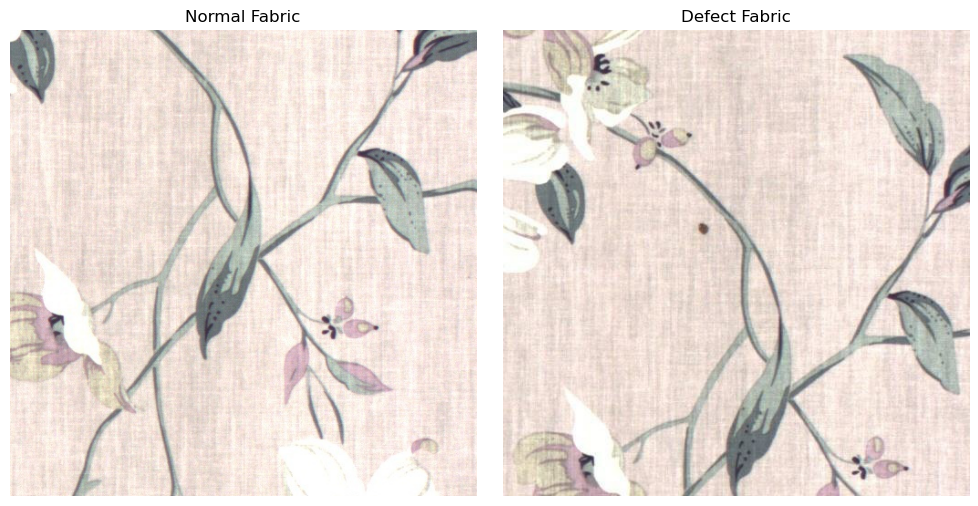

In [25]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set your folders
normal_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal1'
defect_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect'

# Get the first image file from each folder
normal_image_path = os.path.join(normal_folder, os.listdir(normal_folder)[0])
defect_image_path = os.path.join(defect_folder, os.listdir(defect_folder)[0])

# Open the images
normal_image = Image.open(normal_image_path)
defect_image = Image.open(defect_image_path)

# Plot side by side
plt.figure(figsize=(10, 5))

# Display Normal Image
plt.subplot(1, 2, 1)
plt.imshow(normal_image)
plt.title("Normal Fabric")
plt.axis('off')

# Display Defect Image
plt.subplot(1, 2, 2)
plt.imshow(defect_image)
plt.title("Defect Fabric")
plt.axis('off')

plt.tight_layout()
plt.show()


In [27]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set folder paths
normal_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal1'
defect_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect'

# Get first image paths
normal_image_path = os.path.join(normal_folder, os.listdir(normal_folder)[0])
defect_image_path = os.path.join(defect_folder, os.listdir(defect_folder)[0])

# Open images and convert to RGB (if not already)
normal_image = Image.open(normal_image_path).convert("RGB")
defect_image = Image.open(defect_image_path).convert("RGB")

# Convert to numpy arrays
normal_array = np.array(normal_image)
defect_array = np.array(defect_image)

# Print shape and few RGB values (Top-Left 5x5 region)
print("Normal Image Shape:", normal_array.shape)
print("Sample RGB values from Normal Image (Top-left 5x5 pixels):\n", normal_array[:5, :5])

print("\nDefect Image Shape:", defect_array.shape)
print("Sample RGB values from Defect Image (Top-left 5x5 pixels):\n", defect_array[:5, :5])


Normal Image Shape: (512, 512, 3)
Sample RGB values from Normal Image (Top-left 5x5 pixels):
 [[[253 255 254]
  [253 255 252]
  [253 255 252]
  [254 254 252]
  [254 254 252]]

 [[253 255 254]
  [254 254 252]
  [254 254 252]
  [254 254 254]
  [254 254 254]]

 [[254 255 255]
  [255 255 253]
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [255 255 253]
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[254 254 252]
  [254 254 252]
  [254 254 252]
  [254 254 254]
  [254 254 254]]]

Defect Image Shape: (512, 512, 3)
Sample RGB values from Defect Image (Top-left 5x5 pixels):
 [[[178 157 156]
  [195 174 171]
  [213 194 188]
  [221 203 193]
  [218 202 187]]

 [[177 156 155]
  [186 165 162]
  [199 178 173]
  [208 190 180]
  [215 197 185]]

 [[182 158 158]
  [180 159 158]
  [185 164 161]
  [197 177 170]
  [210 192 180]]

 [[188 163 166]
  [184 160 160]
  [184 160 158]
  [190 169 164]
  [205 185 176]]

 [[192 166 169]
  [189 163 166]
  [185 161 161]
  [187 163 161]
  [194 17

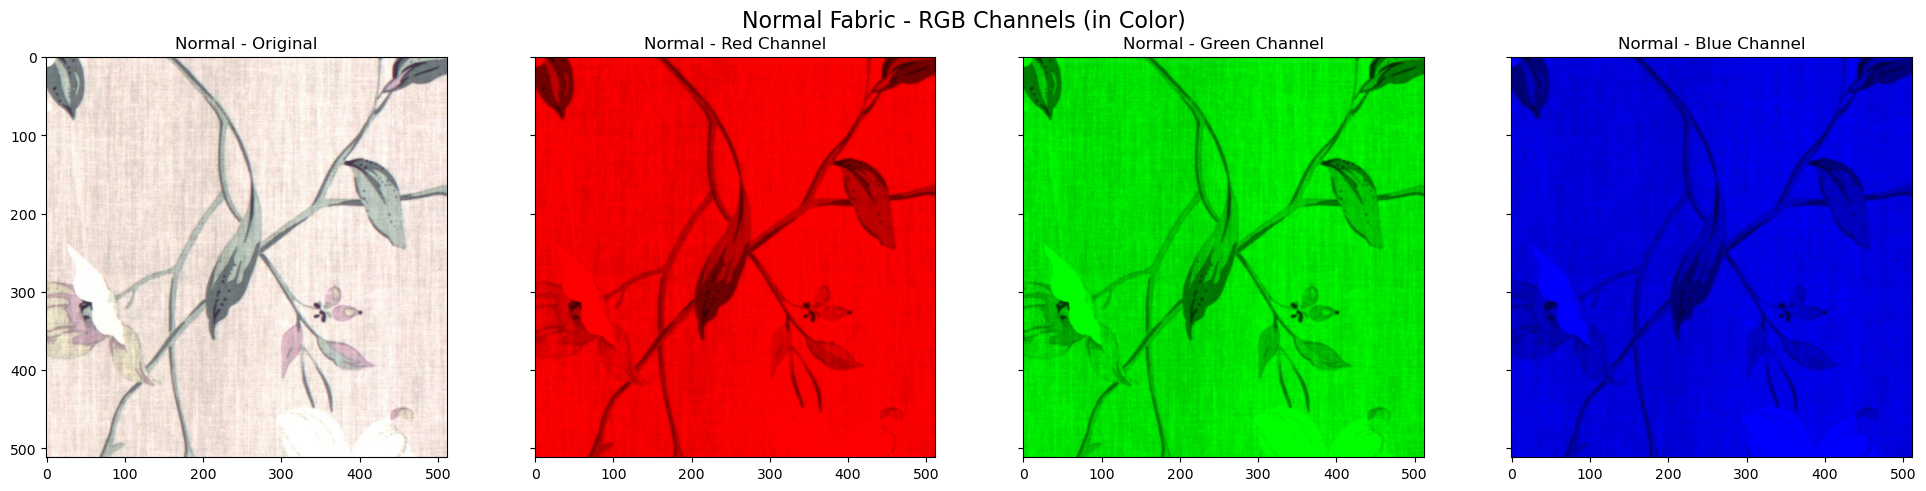

In [53]:

# Function to create a tinted RGB channel image
def get_channel_image(image_array, channel_index):
    channel_img = np.zeros_like(image_array)
    channel_img[:, :, channel_index] = image_array[:, :, channel_index]
    return channel_img

# --- Plot for Normal Image ---
fig1, (n1, n2, n3, n4) = plt.subplots(1, 4, sharey=True)
fig1.set_figwidth(20)

n1.imshow(normal_array)
n1.set_title("Normal - Original")

n2.imshow(get_channel_image(normal_array, 0))  # Red
n2.set_title("Normal - Red Channel")

n3.imshow(get_channel_image(normal_array, 1))  # Green
n3.set_title("Normal - Green Channel")

n4.imshow(get_channel_image(normal_array, 2))  # Blue
n4.set_title("Normal - Blue Channel")

fig1.suptitle('Normal Fabric - RGB Channels (in Color)', fontsize=16)
plt.tight_layout()
plt.show()


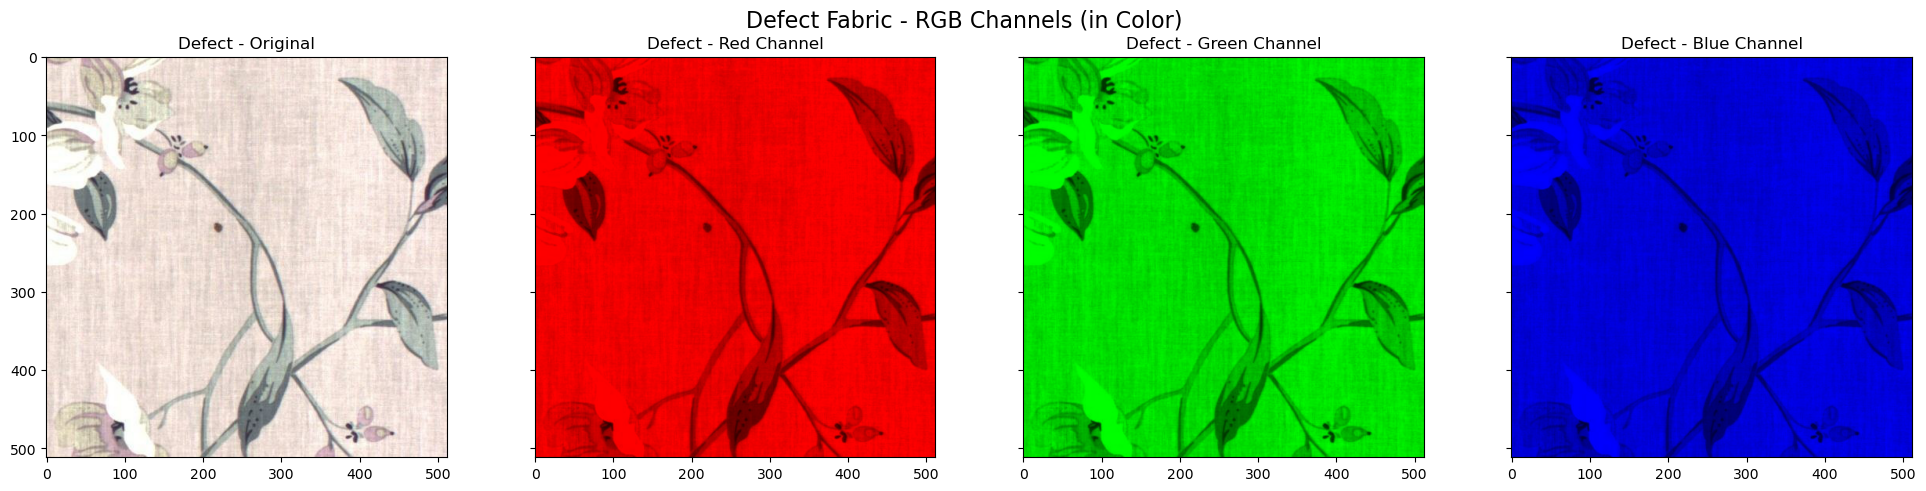

In [55]:
# --- Plot for Defect Image ---
fig2, (d1, d2, d3, d4) = plt.subplots(1, 4, sharey=True)
fig2.set_figwidth(20)

d1.imshow(defect_array)
d1.set_title("Defect - Original")

d2.imshow(get_channel_image(defect_array, 0))  # Red
d2.set_title("Defect - Red Channel")

d3.imshow(get_channel_image(defect_array, 1))  # Green
d3.set_title("Defect - Green Channel")

d4.imshow(get_channel_image(defect_array, 2))  # Blue
d4.set_title("Defect - Blue Channel")

fig2.suptitle('Defect Fabric - RGB Channels (in Color)', fontsize=16)
plt.tight_layout()
plt.show()